# Final Project

* Minoru Kitajima
* 0500 35 9081

# Over view
The purpose of this report is to identify the factors that influence coffee sensory evaluation and overall consumer preference. The key dependent variable (DV) is Liking, measured on a 1–5 scale, indicating how much the taster liked the coffee sample. Key independent variables (IVs) include:
* Position (order in which the sample was presented within a session)
* Sensory attributes (binary indicators, 0 or 1), such as:
* Fruity
* Floral
* Nutty
* Chocolate
* Dark chocolate
* Caramel
* Roasted
* Bitter
* Astringent
* Sweet
* Sour
* Thick/viscous
* Rubber
and several others. This dataset contains 3186 observations, each representing one evaluated coffee sample. Each case includes judge information, cluster assignment, session metadata, brewing parameters, sensory descriptors, and the DV (Liking).
The data come from the [Consumer preference data for black coffee](https://datadryad.org/dataset/doi:10.25338/B8993H):
Analyses of this dataset have been published previously in Ristenpart et al. (2023).
#### References:
Cotter, R. (2023). Coffee sensory evaluation dataset (Version 1). Published January 16, 2023 on Dryad. [link](https://doi.org/10.25338/B8993H)

# Descriptive statistics

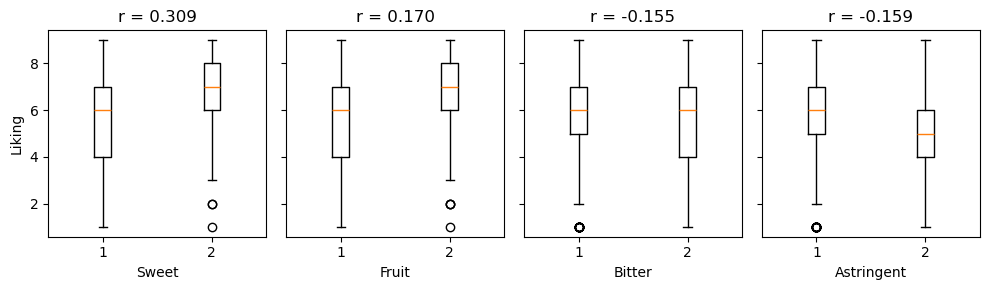

In [1]:
from parse import load_data
from descriptive import boxplot0, parabolaplot
df = load_data("data.csv")
boxplot0("data.csv", "Liking")

                 fig.1 (a)                        fig.1(b)                          fig.1(c)                       fig.1 (d)
                                        Boxplots of Liking by Sweet, Fruit, Bitter, and Astringent

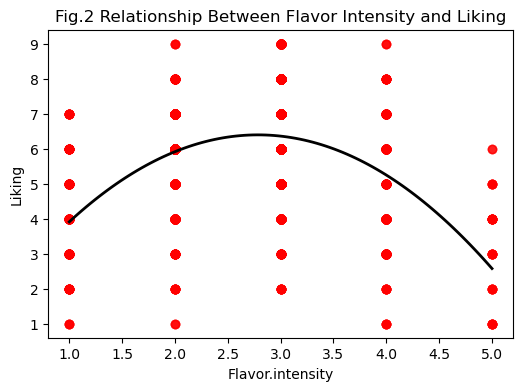

In [2]:
parabolaplot("data.csv", "Liking")

To investigate how the four indicators Sweet, Fruits, Bitter, and Astringent—each taking values of 0 or 1—influence Liking, I categorised them by value and created box plots. Additionally, to examine the effect of Flavor.intensity, which takes values of 1, 2, 3, 4, or 5, I created a scatter plot.
For Sweet, Fruits, Bitter, and Astringent, I calculated the correlation coefficients with Liking. The correlation coefficient for Sweet was the largest, at 0.309. The absolute values of the correlation coefficients for Fruit, Bitter, and Astringent were small.
For Flavor.intensity, I performed regression using a quadratic function. A negative correlation was observed for the coefficient of x².

# Hypothesis testing

#### <span style="color: blue;">Hypothesis</span>
- Bitterness alone does not largely change the median liking score, but in combination with other taste attributes such as astringency or flavor intensity, it substantially decreases consumer liking.
- In addition, the presence of bitterness increases the variability of liking scores.

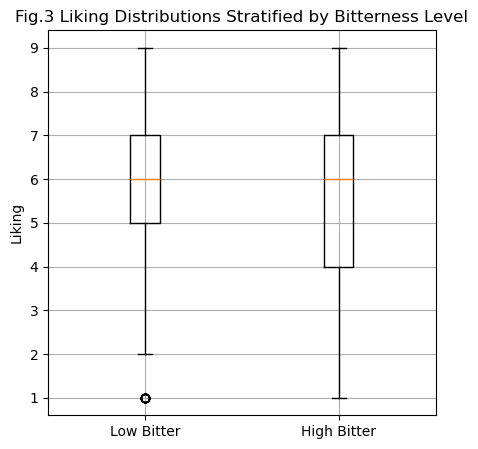

In [3]:
from descriptive import plot_bitter_liking_box, plot_median_variance_scatter
plot_bitter_liking_box("data.csv")

### interpretation
In Figure, we compared the liking scores between the Low Bitter group (Bitter=0) and the High Bitter group (Bitter=1).
A Welch’s t-test revealed a statistically significant difference between the two distributions (p < 0.0001).
The effect size was Cohen’s d = 0.338, indicating a small-to-medium effect.
Since both groups had sufficiently large sample sizes (N=2183 and N=1003), the results are highly reliable.
Although the medians are the same, these findings confirm that the presence of bitterness significantly decreases consumer liking in terms of the overall distribution.

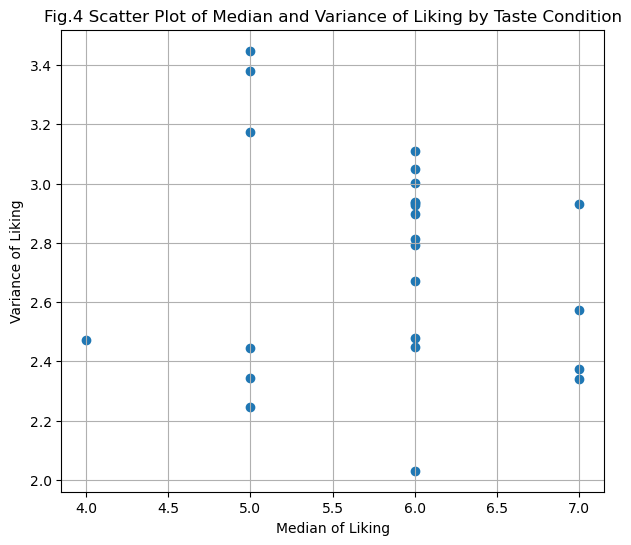

In [4]:
plot_median_variance_scatter("data.csv")

The values used to create this scatter plot are summarized in the table below.

|Feature1|Value1|Feature2|Value2|N_samples|Median_Liking|Var_Liking|
|-|-|-|-|-|-|-|
|Bitter|0|Fruit|0|1768|6.0|3.048586|
|Bitter|0|Fruit|1|415|7.0|2.375263|
|Bitter|1|Fruit|0|916|6.0|2.793771|
|Bitter|1|Fruit|1|87|6.0|3.000802|
|Bitter|0|Astringent|0|1975|6.0|2.897465|
|Bitter|0|Astringent|1|208|5.0|3.448161|
|Bitter|1|Astringent|0|850|6.0|2.811231|
|Bitter|1|Astringent|1|153|4.0|2.470674|
|Bitter|0|FlavorGroup|0|784|6.0|2.477806|
|Bitter|0|FlavorGroup|1|1399|7.0|2.930490|
|Bitter|1|FlavorGroup|0|209|5.0|2.342841|
|Bitter|1|FlavorGroup|1|794|6.0|2.932957|
|Fruit|0|Astringent|0|2376|6.0|2.926269|
|Fruit|0|Astringent|1|308|5.0|3.172258|
|Fruit|1|Astringent|0|449|7.0|2.339037|
|Fruit|1|Astringent|1|53|6.0|2.670537|
|Fruit|0|FlavorGroup|0|866|5.0|2.445641|
|Fruit|0|FlavorGroup|1|1818|6.0|3.108431|
|Fruit|1|FlavorGroup|0|127|6.0|2.030746|
|Fruit|1|FlavorGroup|1|375|7.0|2.572578|
|Astringent|0|FlavorGroup|0|894|6.0|2.447517|
|Astringent|0|FlavorGroup|1|1931|6.0|2.936242|
|Astringent|1|FlavorGroup|0|99|5.0|2.245723|
|Astringent|1|FlavorGroup|1|262|5.0|3.379427|

### interpretation
Figure above presents a scatter plot of the median liking score and the variance of liking for each taste condition.

Conditions that appear on the right side of the graph are generally more liked, while those lower on the graph show more consistent evaluations.

From this plot, we can see that samples with high fruitiness and low flavor intensity are both well-liked and stable in their ratings.
In contrast, conditions with high astringency tend to show larger variances, meaning that opinions are more split for these samples.
Additionally, the combination of high bitterness and high astringency shows a low median and relatively low variance, suggesting that many people dislike these samples in a similar way.

# Machine Learning
### ML 1
First, I performed machine learning using explanatory variables that included the squared term of Flavor.intensity. The mean and variance of the R² values with and without preprocessing (standardization and the PowerTransformer) are shown below.

In [5]:
from machine import show_all 
from machine import show_temp_separate
show_all()

0.3280718338875802 0.0009652262410782107
0.32720098692917887 0.0009992518007904724


Comparing the two mean values, there is almost no difference, indicating that the PowerTransformer does not provide a meaningful improvement.The difference between the two mean R² values is much smaller than the variability across folds, indicating that the effect of the preprocessing is within cross-validation noise.

### ML 2
Next, I performed machine learning separately for two groups divided by whether the Pour Temperature was above or below its median value.
For both the low-temperature and high-temperature groups, the mean and variance of the R² values with and without preprocessing are reported below.
In addition, the estimated coefficient values for the low- and high-temperature groups are shown below for comparison.

In [6]:
show_temp_separate()

0.3042811436945834 0.0027381393201415163
0.30253032482186004 0.0026778587114977995
0.3560659982422668 0.002176975066410564
0.3587381819329569 0.002204046693882737
                     coef_low  coef_high  diff_high_low
Dose                 0.497478  -0.655140      -1.152618
Volume              -0.388280   0.413224       0.801504
Percent Extraction   0.183354  -0.305914      -0.489269
Flavor.intensity     3.534808   3.814069       0.279261
Fruit                0.536520   0.337986      -0.198535
Mouthfeel            0.024799   0.181343       0.156544
Grind               -0.070681   0.071210       0.141891
Acidity             -0.132689   0.007738       0.140427
Brew Mass           -0.062647  -0.195091      -0.132445
90Sec Temp           0.092673  -0.028019      -0.120692
Brew Temperature    -0.134584  -0.057293       0.077291
Astringent          -0.443301  -0.513040      -0.069740
Sour                -0.578363  -0.645040      -0.066677
Flavor.intensity_sq -0.743308  -0.808178      -0.0648

The presence or absence of preprocessing had only a negligible effect on predictive performance in both the low- and high-temperature groups, with differences in mean R² remaining within cross-validation variability.
In contrast, comparison of the fitted coefficients revealed substantial structural differences between the two groups. In particular, variables related to extraction conditions, such as Dose and Volume, exhibited clear sign reversals, indicating that their relationships with Liking differ depending on Pour Temperature.
Meanwhile, the nonlinear structure associated with Flavor intensity was consistent across both groups, suggesting that temperature primarily alters the contribution of extraction conditions rather than the underlying preference structure for flavor characteristics.

# Summary
This report investigated the determinants of consumer liking for coffee samples using a dataset of 3,186 sensory evaluations. Descriptive analyses showed that sweetness had the strongest positive correlation with liking, while bitterness and astringency alone exhibited weaker linear relationships. Flavor intensity displayed a nonlinear relationship with liking, with diminishing returns at higher intensity levels.

Hypothesis testing demonstrated that bitterness significantly lowers overall liking despite similar median scores, as evidenced by a Welch’s t-test with a small-to-medium effect size. Moreover, bitterness and astringency were associated with increased variability in liking, indicating greater disagreement among consumers. In contrast, combinations involving high fruitiness and low flavor intensity were both highly rated and consistently evaluated, while high bitterness combined with high astringency resulted in uniformly low liking.

Machine learning analyses using linear regression with and without preprocessing showed that transformations such as standardization and power transformation had negligible effects on predictive performance, with differences in R² remaining within cross-validation variability. However, stratifying the data by pour temperature revealed meaningful structural differences in the fitted models. Coefficients associated with extraction conditions, including dose and volume, exhibited sign reversals between low- and high-temperature groups, whereas the nonlinear effect of flavor intensity remained stable. These findings suggest that pour temperature modulates how extraction parameters influence liking, while underlying preferences for flavor characteristics are largely preserved.